# Data Preprocessing & Linear Regression

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Loading the raw data

In [2]:
raw_data = pd.read_csv('CarSelling Portal Data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Why we chosen a Linear Regression  algorithm for a Car selling data set
<li>Wether the relationship b/w dependent variable and independent variable is linear.
    <li>whether the Variance of residuals is constent.
        <li>Weather all of the features are independent of each other.
            <li>Weather the Distribution of Y is normal.


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
# data = raw_data.drop(['Model'],axis=1)
# data.describe(include='all')
data=raw_data

### Dealing with missing values


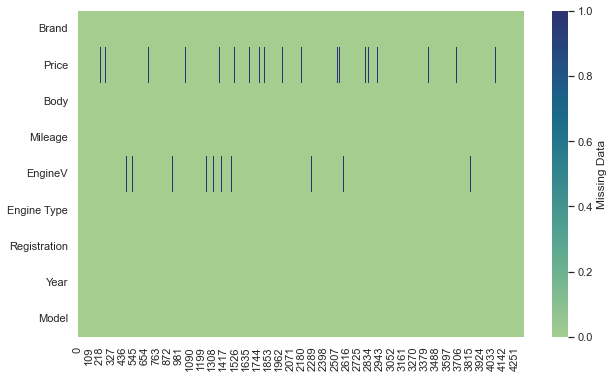

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="crest",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

### Dropping null values

In [7]:
data_no_mv = data.dropna(axis=0)

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


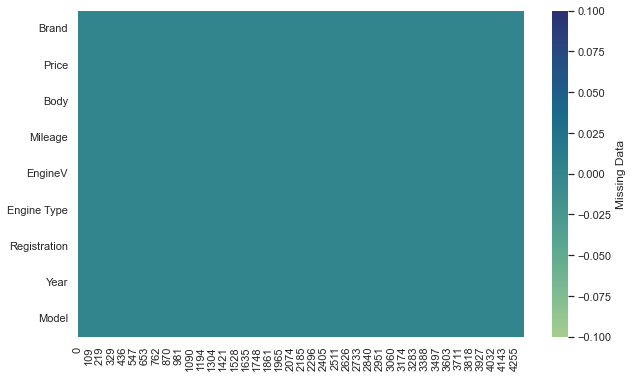

In [9]:
#After dropping Null values
plt.figure(figsize=(10,6))
sns.heatmap(data_no_mv.isna().transpose(),
            cmap="crest",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

### Exploring the PDFs

<AxesSubplot:xlabel='Price', ylabel='Density'>

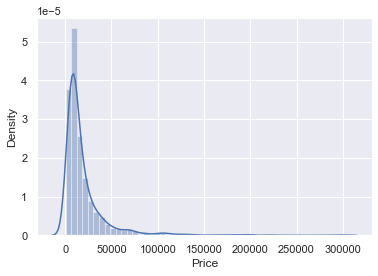

In [10]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [11]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


<AxesSubplot:xlabel='Price', ylabel='Density'>

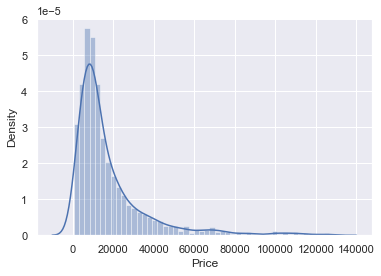

In [12]:
sns.distplot(data_1['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

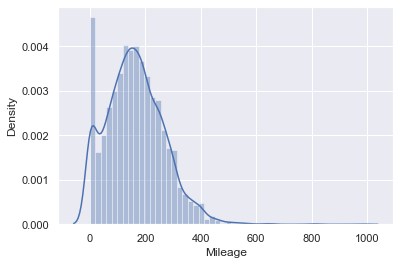

In [13]:
sns.distplot(data_no_mv['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,185
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,NaN
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

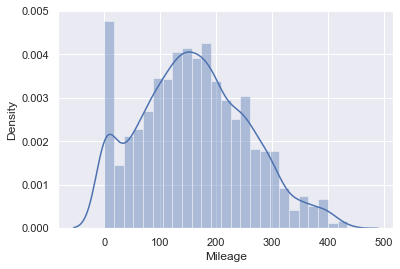

In [15]:
sns.distplot(data_2['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

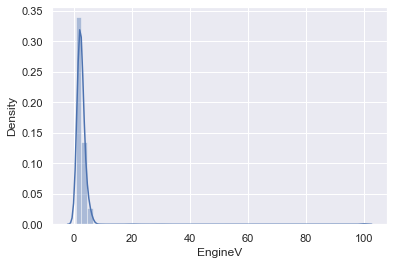

In [16]:
sns.distplot(data_no_mv['EngineV'])

In [17]:
data_3 = data_2[data_2['EngineV']<20]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

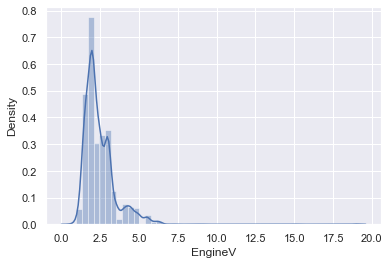

In [18]:
sns.distplot(data_3['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

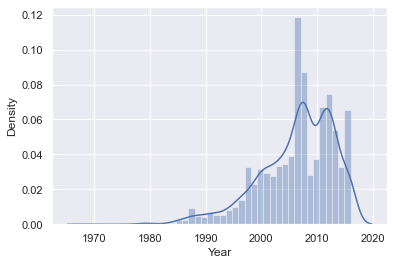

In [19]:
sns.distplot(data_no_mv['Year'])

In [20]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<AxesSubplot:xlabel='Year', ylabel='Density'>

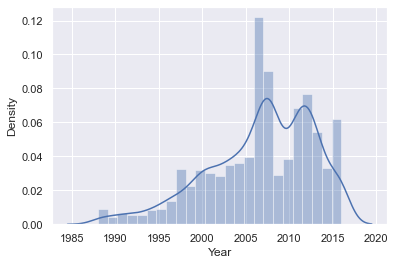

In [21]:
sns.distplot(data_4['Year'])

In [22]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [23]:
data_cleaned.describe(include='all')
data_cleaned.to_csv('clean_Data.csv',index=False)

## Transforming the data to suit Linear Regression

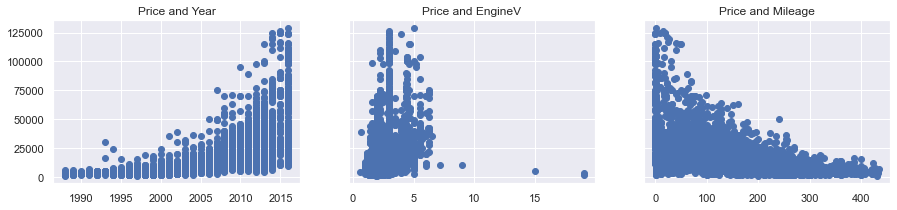

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

### Relaxing the assumptions

In [25]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3868,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3869,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3870,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3871,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


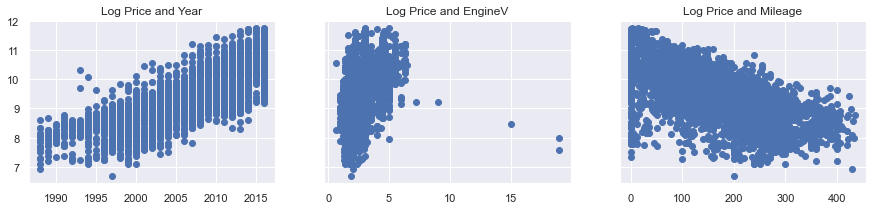

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [27]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [28]:
data_cleaned.shape
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i)
for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [30]:
vif

,VIF,features
0,3.794053,Mileage
1,9.159139,Year
2,6.515271,EngineV


In [31]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [32]:
data_no_multicollinearity = data_cleaned.drop(['Model'],axis=1)

## Create dummy variables

In [33]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [34]:
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [35]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [36]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [37]:
data_preprocessed = data_with_dummies[cols]
# data_preprocessed = data_with_dummies

data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [38]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [40]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [42]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
y_hat = reg.predict(x_train)

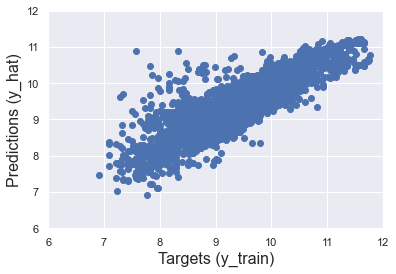

In [44]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=16)
plt.ylabel('Predictions (y_hat)',size=16)
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

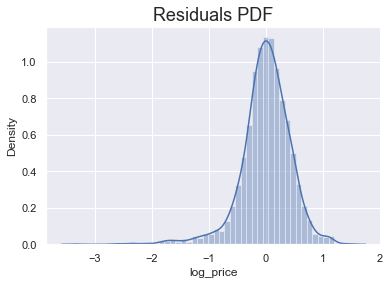

In [45]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [ ]:
### 

In [47]:
reg.score(x_test,y_test)

0.7081653302410466

### Finding the weights and bias

In [208]:
reg.intercept_

9.416246719435561

In [209]:
reg.coef_

array([-0.45732032,  0.20207355,  0.02344425,  0.02276856, -0.13454097,
       -0.18003822, -0.05384477, -0.09083928, -0.15369503, -0.10732619,
       -0.20344696, -0.13185485, -0.17022154, -0.12578863, -0.03173919,
       -0.15049731,  0.32041372])

In [210]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.457320
1,EngineV,0.202074
2,Brand_BMW,0.023444
3,Brand_Mercedes-Benz,0.022769
4,Brand_Mitsubishi,-0.134541
5,Brand_Renault,-0.180038
6,Brand_Toyota,-0.053845
7,Brand_Volkswagen,-0.090839
8,Body_hatch,-0.153695
9,Body_other,-0.107326


In [211]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [212]:
y_hat_test = reg.predict(x_test)

In [213]:
y_hat_test

array([ 9.34011851, 10.78412655,  9.34670406,  8.98167525, 10.96587127,
        9.44014741,  9.19260419,  9.64705699,  9.33397955,  9.64920529,
        7.58761692,  7.81217873,  9.32601624, 10.46015857,  9.15495775,
        8.7422168 ,  8.94388435, 11.11982143,  9.06770625,  9.15666821,
        9.07546314,  7.94298712,  8.51010104,  9.50143558,  8.59122388,
       10.14514297,  9.50385776,  9.48487837,  9.4570371 ,  9.65498074,
       10.75591555,  8.9795182 ,  8.97790484,  9.2059695 ,  8.86033948,
       10.51943006,  8.94885939,  7.82094995,  9.66158459,  8.89506325,
       10.2544864 , 10.10603272,  9.82922507,  8.5646857 , 10.34203722,
       10.56783705,  9.24202173,  9.84075495,  9.72991496,  8.82928255,
        9.15981406,  8.58949391,  8.10583081,  9.12374797,  9.61398675,
        8.08835518,  8.91535106,  9.29719853, 10.18429935,  9.49659659,
        8.83242636,  9.93123202,  8.69304018,  9.43289987,  8.78908875,
       10.91090793,  9.1067925 ,  8.91807579, 10.11298883,  8.88

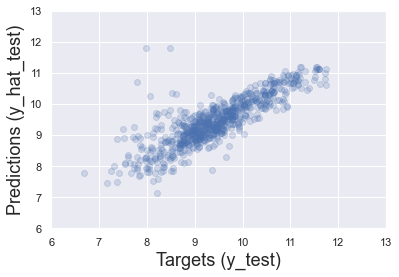

In [214]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [215]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head(10)

,Prediction
0,11385.757509
1,48248.814987
2,11460.986391
3,7955.949189
4,57865.190048
5,12583.571697
6,9824.201807
7,15476.174408
8,11316.074882
9,15509.457645


In [216]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,11385.757509,NaN
1,48248.814987,7900.0
2,11460.986391,NaN
3,7955.949189,NaN
4,57865.190048,NaN


In [217]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.287301
1    10.568750
2     9.392662
3     9.375855
4    11.050874
Name: log_price, dtype: float64

In [218]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,11385.757509,10800.0
1,48248.814987,38900.0
2,11460.986391,12000.0
3,7955.949189,11800.0
4,57865.190048,62999.0


In [219]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

Mean Absolute Error: 0.33009492394062195
Mean Squared Error: 0.22987835613402435
Root Mean Squared Error: 0.4794563130609757


In [220]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [221]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,11385.757509,10800.0,-585.757509,5.423681
1,48248.814987,38900.0,-9348.814987,24.032943
2,11460.986391,12000.0,539.013609,4.491780
3,7955.949189,11800.0,3844.050811,32.576702
4,57865.190048,62999.0,5133.809952,8.149034
...,...,...,...,...
770,8240.475399,11900.0,3659.524601,30.752308
771,8235.456249,8800.0,564.543751,6.415270
772,17988.435202,21500.0,3511.564798,16.332860
773,11240.610192,9499.0,-1741.610192,18.334669


In [222]:
sum(df_pf['Difference%'])/len(df_pf['Difference%'])

47.784202852703075

### Conclusion 
<Li>Mean Absolute Error: 0.33009492394062195
<li>Mean Squared Error: 0.22987835613402435
<li>Root Mean Squared Error: 0.4794563130609757